In [2]:
import numpy as np
from scipy.stats import pareto
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from relativeEfficiencyLib import *
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import pandas as pd 
%matplotlib inline

In [8]:
from statsmodels.stats.outliers_influence import summary_table
def get_summary_table(model):
    
    df = pd.DataFrame(model.summary().tables[1].data)
    # Select first row as column names:
    df.columns = df.iloc[0, :]
    # Select first column as row names
    df.index = df.iloc[:, 0]
    # Remove the first (i.e. 0th) column and first row
    df = df.iloc[1:, 1:].astype(float)
    
    return df

def estimate_ratio_interval(n, ratio, threshold = 3.5):
    
    df = pd.DataFrame({'n':np.tile(n, ratio.shape[0]), 'ratio':ratio.flatten()})
    dfr = df[np.abs(df["ratio"]) < threshold]
    x_mat = np.column_stack((np.ones(dfr.shape[0]), dfr['n'].values))
    y = dfr['ratio'].values
    lm_fit = sm.OLS(y, x_mat).fit()

    dt = summary_table(lm_fit, alpha = 0.05)[1]
    y_fit = dt[:, 2]
    ym_ci_lower, ym_ci_upper = dt[:, 4:6].T
    
    coef = get_summary_table(lm_fit).loc['x1', 'coef']
    
    return pd.DataFrame(np.column_stack([dfr['n'].values, y_fit, ym_ci_lower, ym_ci_upper])).sort_values(0), np.abs(coef)

In [2]:
out = compRelEffVarShape()

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]
Computing Mu,
[0.03367235380041074]
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
Computing Mu,
[0.019212525381998885]
[1.  1.3 1.6 1.9 2.2 2.5 2.8 3.1 3.4 3.7]
Computing Mu,
[0.014812771076220687]


/Users/omidshamssolari/workspace/Betta/cmc.py:175: RuntimeWarning: divide by zero encountered in log
  self.relEff = np.log(


[1.  1.4 1.8 2.2 2.6 3.  3.4 3.8 4.2 4.6]
Computing Mu,
[0.01286436678380948]


In [6]:
from scipy.interpolate import CubicSpline

In [10]:
x.shape

(10,)

In [7]:
CubicSpline( ratio, x)

ValueError: The length of `y` along `axis`=0 doesn't match the length of `x`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
1
2
3


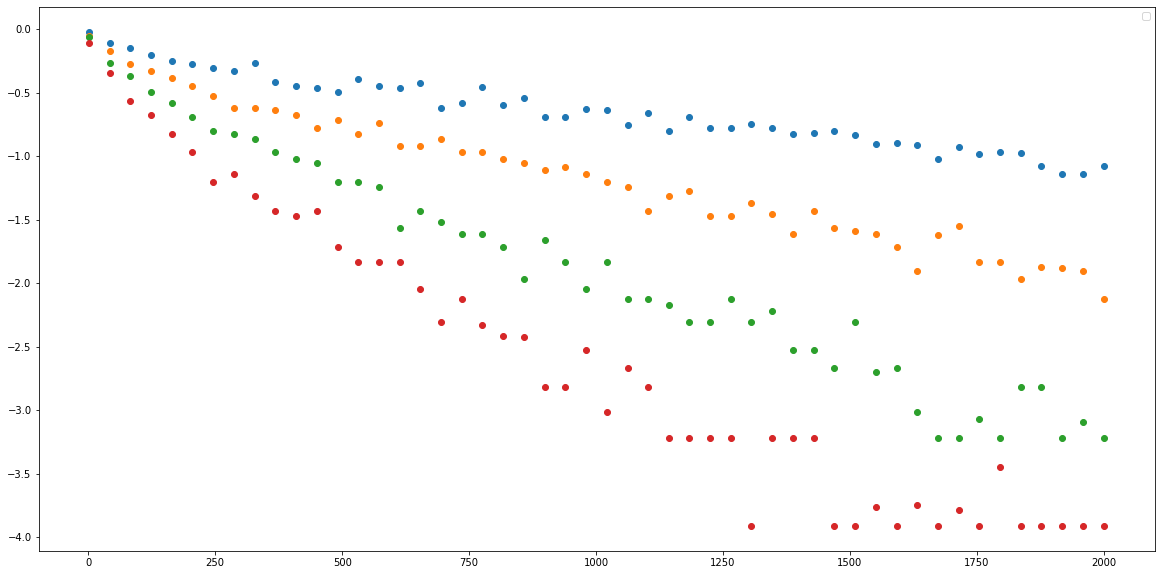

In [4]:
fig, ax = plt.subplots(figsize = [20, 10])
for i in range(len(out)):
    print(i)
    n, ratio, shape, mu, c = out[i]
    ratio = processRatio(ratio)
    n = n[~np.isnan(ratio)]
    ratio = ratio[~np.isnan(ratio)]
    x = np.linspace(n.min(), n.max(), 10)
    ratiox = spline(n, ratio, x)
    ax.scatter(n, ratio)
    ax.plot(x, ratiox, label = "".join(["alpha = [1,", str(i+2),"]"]))
ax.legend()

In [ ]:
fig.savefig("./varyingAlpha.pdf")

In [ ]:
outAlphaMinVar = compRelEffVarShapeVarMin()

In [ ]:
fig, ax = plt.subplots(figsize = [20, 10])
for i in range(len(outAlphaMinVar)):
    print(i)
    n, ratio = outAlphaMinVar[i]
    ratio = processRatio(ratio)
    n = n[~np.isnan(ratio)]
    ratio = ratio[~np.isnan(ratio)]
    x = np.linspace(n.min(), n.max(), 15)
    ratiox = spline(n, ratio, x)
    ax.scatter(n, ratio)
    ax.plot(x, ratiox, label = "".join(["alpha = [", str(ss[i][0]),", ", str(ss[i][1]),"]"]))
ax.legend()

In [ ]:
fig.savefig("./varMinAlpha.pdf")

In [ ]:
outAlphaMinVar = compRelEffVarShapeVarMin(ALPHA=
                                          [np.linspace( e, e + 1, 10, endpoint=False) for e in np.linspace(1, 5, 11)])

In [ ]:
fig, ax = plt.subplots(figsize = [20, 10])
popt = np.array([0,0,2000])
for i in range(len(outAlphaMinVar)):
    n, ratio, shape, mu, c = outAlphaMinVar[i]
    ratio = processRatio(ratio)
    n = n[~np.isnan(ratio)]
    ratio = ratio[~np.isnan(ratio)]
    x = np.linspace(n.min(), n.max(), 500)
    popt, pcov = curve_fit(func1, n, ratio, bounds=([-1, -5, 450], [0, 0, 2000]))
    ratiox = func1(x, *popt)
    ax.scatter(n, ratio)
    ax.plot(x, ratiox, label = "".join(["alpha = [", str(np.min(shape)),", ",
                                        str(np.max(shape)),"], mu = ", np.str(mu)]))
    
ax.set_xlim([0, 2200])
ax.set_ylim([-4.5, 0])
ax.set_xlabel(r'n', fontsize = 20)
ax.set_ylabel(r"$ log(\frac{\mathbb{P}[|\bar{Z}_n(x) - \mu(x)|> \kappa \mu(x)]} \
              {\mathbb{P}[|\hat{\mu}_n(x) - \mu(x)|> \kappa \mu(x)]})$", fontsize = 20)
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize = [20, 10])
nValues = np.linspace(1, 5, 11, endpoint= True)
normalize = mcolors.Normalize(vmin=nValues.min(), vmax=nValues.max())
colormap = cm.jet
for i in range(len(outAlphaMinVar)):
    n, ratio, shape, mu, c = outAlphaMinVar[i]
    ratio = processRatio(ratio)
    n = n[~np.isnan(ratio)]
    ratio = ratio[~np.isnan(ratio)]
    x = np.linspace(n.min(), n.max(), 500)
    popt, pcov = curve_fit(func1, n, ratio, bounds=([-1, -5, 400], [0, 0, 2000]))
    ratiox = func1(x, *popt)
    ax.scatter(n, ratio, alpha = .3, color=colormap(normalize(nValues[i])))
    ax.plot(x, ratiox, color=colormap(normalize(nValues[i])),
            label = "".join(["c = ", np.str("{:.0e}".format(c))," ,mu = ", np.str("{:.2e}".format(mu))]))
    if i <= 4:
        if i == 0:
            ax.text( 1945, ratiox[-1]+.02, r'$\mu = $' + np.str("{:.2e}".format(mu)))
        else:
            ax.text( 2020, ratiox[-1]+.02, np.str("{:.2e}".format(mu)))
    else:
        ax.text( 2030, -3.85 -.09*(i-5), np.str("{:.2e}".format(mu)))
        ax.plot([2030, x[-1]], [-3.85 -.09*(i-5), ratiox[-1]], 'k-', lw = 1)

ax.set_xlim([0, 2200])
ax.set_ylim([-4.5, 0])
ax.set_xlabel(r'n', fontsize = 20)
ax.set_ylabel(r"$ log(\frac{\mathbb{P}[|\bar{Z}_n(x) - \mu(x)|> \kappa \mu(x)]} \
              {\mathbb{P}[|\hat{\mu}_n(x) - \mu(x)|> \kappa \mu(x)]})$", fontsize = 20)
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nValues)
cbar = fig.colorbar(scalarmappaple)
cbar.set_label(r'$\alpha_{min}$', fontsize = 20)

In [ ]:
outAlphaMinConst = compRelEffVarShapeVarMin(ALPHA=
                                          [np.concatenate([[1],np.linspace( e, e + 1, 10, endpoint=False)]) for e in np.linspace(1, 5, 11)])

In [ ]:
fig, ax = plt.subplots(figsize = [20, 10])
nValues = np.array([np.round(np.mean(outAlphaMinConst[i][2]), 2) for i in range(len(outAlphaMinConst))])
normalize = mcolors.Normalize(vmin=nValues.min(), vmax=nValues.max())
colormap = cm.jet
for i in range(len(outAlphaMinConst)):
    n, ratio, shape, mu, c = outAlphaMinConst[i]
    ratio = processRatio(ratio)
    n = n[~np.isnan(ratio)]
    ratio = ratio[~np.isnan(ratio)]
    x = np.linspace(n.min(), n.max(), 500)
    
    if i < 4:
        optBounds = ([-1, -5, 0], [0, 0, 2000])
    else:
        optBounds = ([-1, -5, 0], [0, 0, 400])
    
    popt, pcov = curve_fit(func1, n, ratio, bounds=optBounds)
    ratiox = func1(x, *popt)
    ax.scatter(n, ratio, alpha = .3, color=colormap(normalize(nValues[i])))
    ax.plot(x, ratiox, color=colormap(normalize(nValues[i])),
            label = "".join(["c = ", np.str("{:.0e}".format(c))," ,mu = ", np.str("{:.2e}".format(mu))]))
    if i <= 2:
        if i == 0:
            ax.text( 1960, ratiox[-1]+.02, r'$\mu = $' + np.str("{:.2e}".format(mu)))
        else:
            ax.text( 2020, ratiox[-1]+.02, np.str("{:.2e}".format(mu)))
    else:
        ax.text( x[-1], ratiox[-1], np.str("{:.2e}".format(mu)))
        #ax.plot([2030, x[-1]], [-3.85 -.09*(i-5), ratiox[-1]], 'k-', lw = 1)

ax.set_xlim([0, 2200])
#ax.set_ylim([-4.5, 0])
ax.set_xlabel(r'n', fontsize = 25)
ax.set_ylabel(r"$ log(\frac{\mathbb{P}[|\bar{Z}_n(x) - \mu(x)|> \kappa \mu(x)]} \
              {\mathbb{P}[|\hat{\mu}_n(x) - \mu(x)|> \kappa \mu(x)]})$", fontsize = 25)
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nValues)
cbar = fig.colorbar(scalarmappaple)
cbar.set_label(r'$\bar{\alpha}$', fontsize = 25)

In [ ]:
fig.savefig("./constMinAlpha.pdf")

In [ ]:
[np.round(np.mean(outAlphaMinConst[i][2]), 2) for i in range(len(outAlphaMinConst))]

In [3]:
outVarC = compRelEffVarC()

C:[ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
Computing Mu,
[0.01921135018173663]
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
Computing Mu,
[0.008225819519171526]


/Users/omidshamssolari/workspace/Betta/cmc.py:175: RuntimeWarning: divide by zero encountered in log
  self.relEff = np.log(


[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
Computing Mu,
[0.005140508820451182]
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
Computing Mu,
[0.003711823260541485]
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
Computing Mu,
[0.0028936511640350253]
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
Computing Mu,
[0.002365433574623569]
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
Computing Mu,
[0.0019971565888680246]
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
Computing Mu,
[0.0017262729383236482]
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
Computing Mu,
[0.0015187877627289544]
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
Computing Mu,
[0.0013549559500631897]


In [4]:
# import pickle as pkl
# with open("./outVarC.pkl", "wb") as f:
    
#     pkl.dump(outVarC, f)
    
with open("./outVarC.pkl", "rb") as f:
    
    outVarC = pkl.load(f)

In [20]:
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})

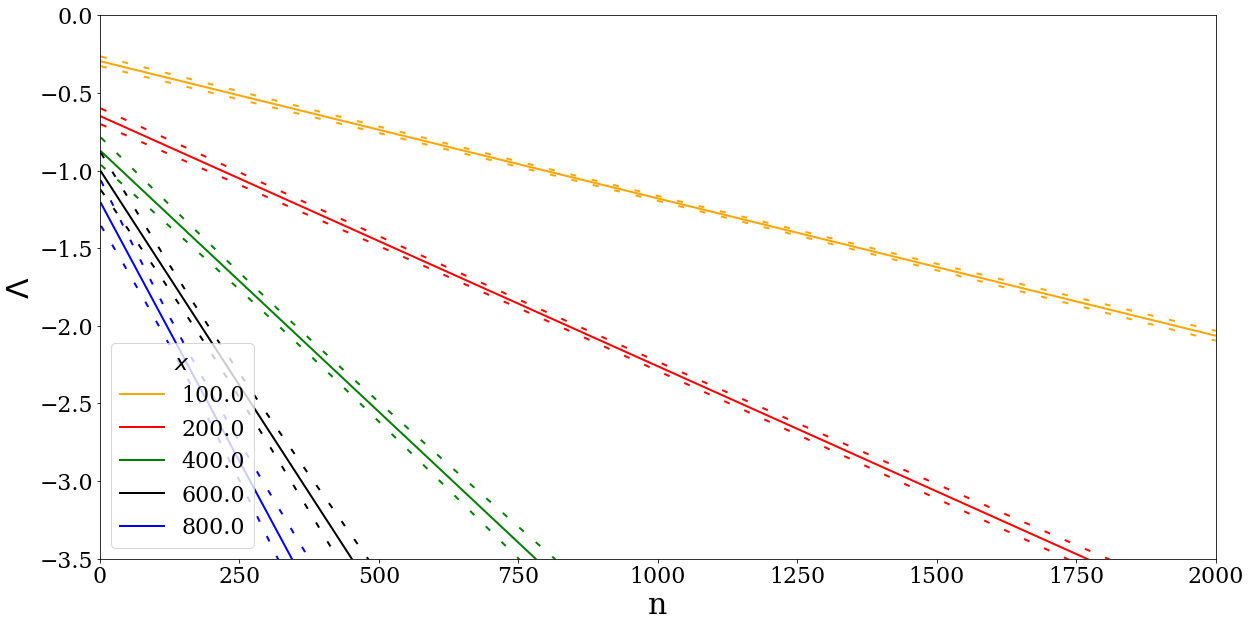

In [23]:
fig, ax = plt.subplots(figsize = [20, 10])
colors = ['blue', "black", "green", "red" , "orange"]
nValues = np.arange(100,1001, 100)
table = np.zeros([len(outVarC), 3])
for i in range(len(outVarC)):
    
    if i in [ 2, 4, 6, 8, 9, 10, 11, 12]:
        continue
    
    color = colors.pop()
    
    n, ratio, shape, mu, c = outVarC[i]
    df, r = estimate_ratio_interval(n, ratio)
    ax.plot(df.iloc[:,0], df.iloc[:,1], lw=2, color=color, label = f"{nValues[i]:.1f}")
    ax.plot(df.iloc[:,0], df.iloc[:,2],
            linestyle = (0, (3, 8)), lw=2, color = color)
    ax.plot(df.iloc[:,0], df.iloc[:,3],
            linestyle = (0, (3, 8)), lw=2, color = color)

#     table[i,:] = shape[0], mu, r
    
ax.set_xlim([0, 2000])
ax.set_ylim([-3.5, 0])
ax.set_xlabel(r'n', fontsize = 30)
ax.set_ylabel(r"$\Lambda$", fontsize = 30)
ax.legend(title=r"$x$", loc='lower left')
fig.savefig("./plots.v.2.0/outVarC.pdf")

AttributeError: module 'statsmodels' has no attribute 'mixedlm'

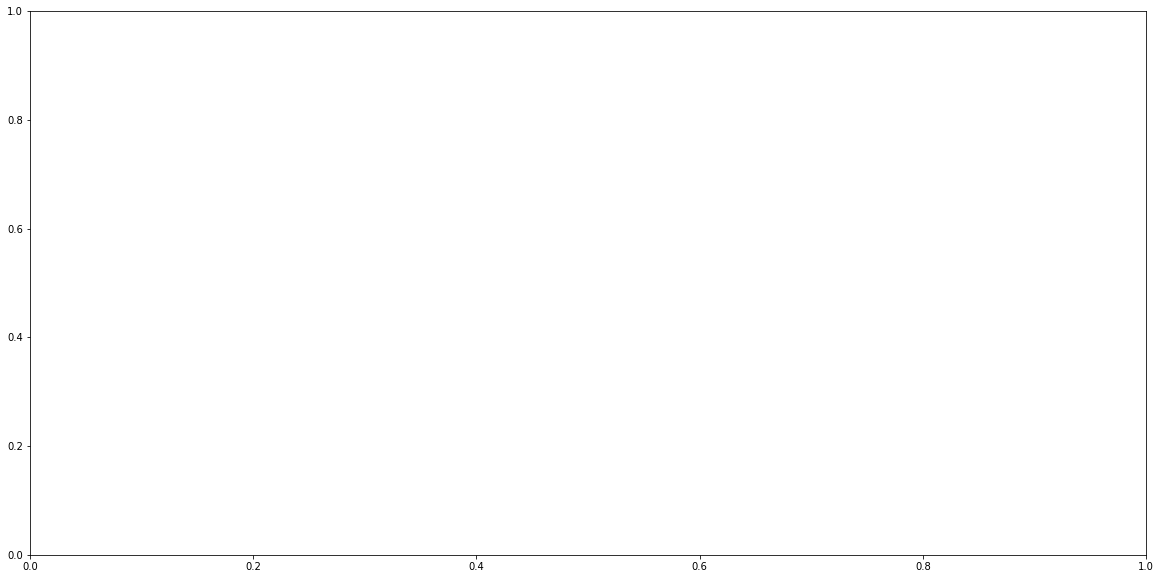

In [5]:
fig, ax = plt.subplots(figsize = [20, 10])
nValues = np.arange(100,1001, 100)
popt = np.array([0,0,800])
table = np.zeros([len(outVarC), 3])
for i in range(len(outVarC)):
    
    n, ratio, shape, mu, c = outVarC[i]
    out = ratioCorrect(n, ratio)
    rLine = out[0]
    r = out[1]
    ax.scatter(rLine["n"], rLine["ratio"], alpha = .1, s = 2, color=colormap(normalize(i*100 + 100)))
    ax.plot(rLine["n"], rLine["fitted"], alpha = .5, lw = .5, color=colormap(normalize(i*100 + 100)),
            label = "".join(["c = ", np.str("{:.0e}".format(c))," ,mu = ", np.str("{:.2e}".format(mu))]))

    table[i,:] = c, mu, r
    
ax.set_xlim([0, 2000])
ax.set_ylim([-3.5, 0])
ax.set_xlabel(r'n', fontsize = 30)
ax.set_ylabel(r"$ log(\Lambda)$", fontsize = 30)

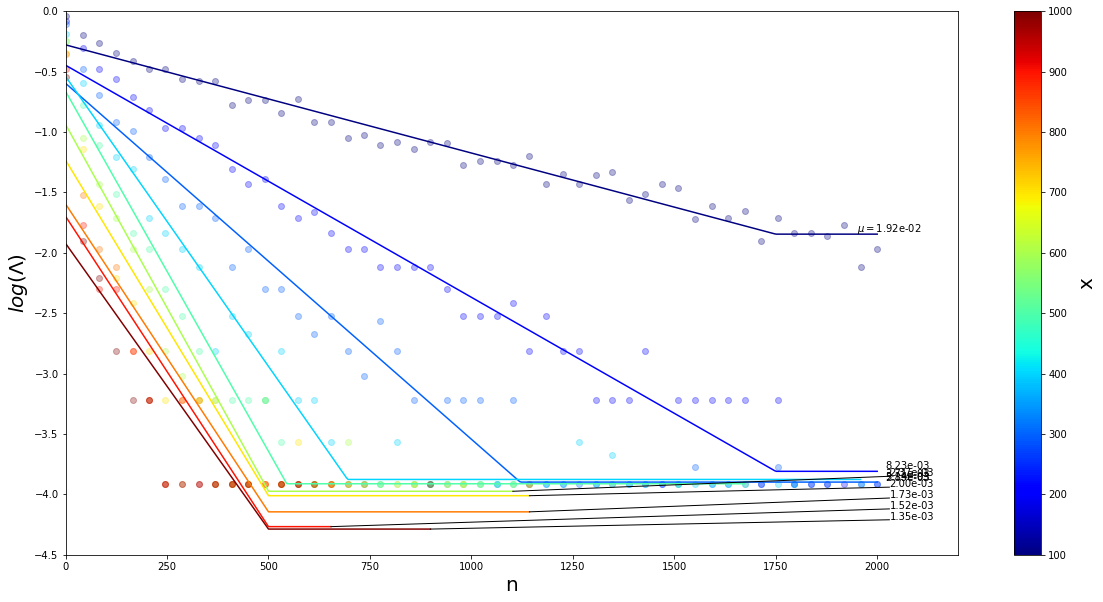

In [9]:
# fig, ax = plt.subplots(figsize = [20, 10])
# nValues = np.arange(100,1001, 100)
# normalize = mcolors.Normalize(vmin=nValues.min(), vmax=nValues.max())
# colormap = cm.jet
# popt = np.array([0,0,800])
# for i in range(len(outVarC)):
#     n, ratio, shape, mu, c = outVarC[i]
#     ratio = processRatio(ratio)
#     n = n[~np.isnan(ratio)]
#     ratio = ratio[~np.isnan(ratio)]
#     x = np.linspace(n.min(), n.max(), 500)
#     popt, pcov = curve_fit(func1, n, ratio, bounds=([-1, -5, 500], [0, 0, 1750]),  p0=popt)
#     ratiox = func1(x, *popt)
#     ax.scatter(n, ratio, alpha = .3, color=colormap(normalize(i*100 + 100)))
#     ax.plot(x, ratiox, color=colormap(normalize(i*100 + 100)),
#             label = "".join(["c = ", np.str("{:.0e}".format(c))," ,mu = ", np.str("{:.2e}".format(mu))]))
#     if i <= 4:
#         if i == 0:
#             ax.text( 1950, ratiox[-1]+.02, '$\mu = $' + np.str("{:.2e}".format(mu)))
#         else:
#             ax.text( 2020, ratiox[-1]+.02, np.str("{:.2e}".format(mu)))
#     else:
#         ax.text( 2030, -3.85 -.09*(i-5), np.str("{:.2e}".format(mu)))
#         ax.plot([2030, x[-1]], [-3.85 -.09*(i-5), ratiox[-1]], 'k-', lw = 1)

# ax.set_xlim([0, 2200])
# ax.set_ylim([-4.5, 0])
# ax.set_xlabel(r'n', fontsize = 20)
# ax.set_ylabel(r"$ log(\Lambda)$", fontsize = 20)
# #ax.set_ylabel(r"$ log(\frac{\mathbb{P}[|\bar{Z}_n(x) - \mu(x)|> \kappa \mu(x)]} \
# #              {\mathbb{P}[|\hat{\mu}_n(x) - \mu(x)|> \kappa \mu(x)]})$", fontsize = 20)
# scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
# scalarmappaple.set_array(nValues)
# cbar = fig.colorbar(scalarmappaple)
# cbar.set_label("x", fontsize = 20)

In [178]:
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})

/Users/darkGene/workspace/repo/CMC/pyEnv/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


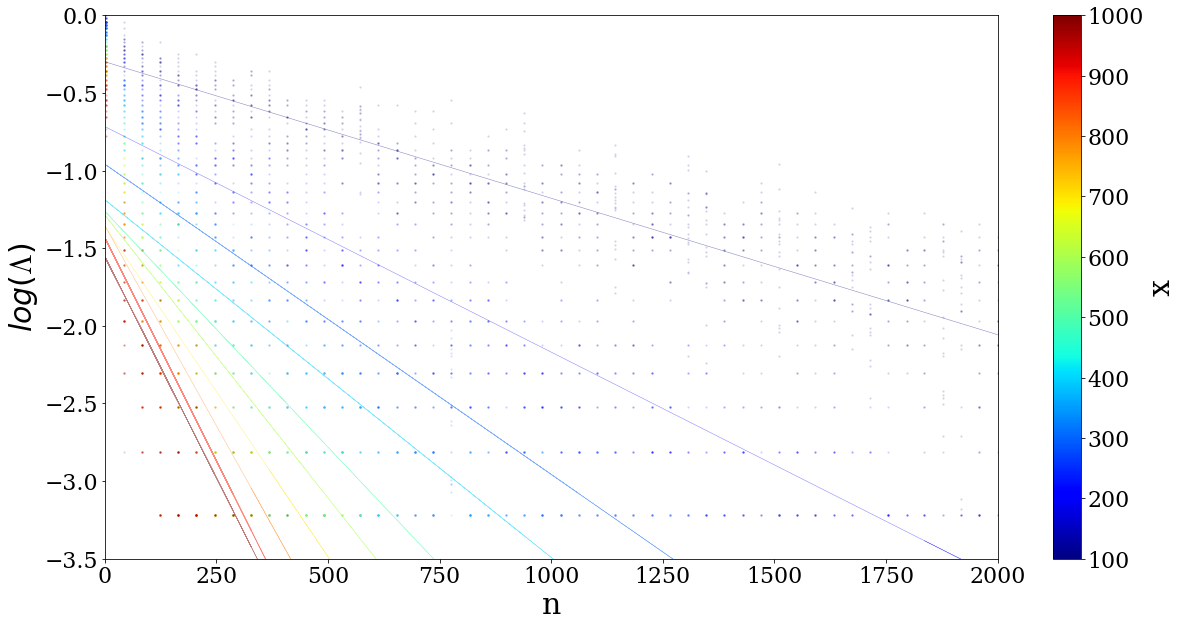

In [236]:
fig, ax = plt.subplots(figsize = [20, 10])
nValues = np.arange(100,1001, 100)
normalize = mcolors.Normalize(vmin=nValues.min(), vmax=nValues.max())
colormap = cm.jet
popt = np.array([0,0,800])
table = np.zeros([len(outVarC), 3])
for i in range(len(outVarC)):
    
    n, ratio, shape, mu, c = outVarC[i]
    out = ratioCorrect(n, ratio)
    rLine = out[0]
    r = out[1]
    ax.scatter(rLine["n"], rLine["ratio"], alpha = .1, s = 2, color=colormap(normalize(i*100 + 100)))
    ax.plot(rLine["n"], rLine["fitted"], alpha = .5, lw = .5, color=colormap(normalize(i*100 + 100)),
            label = "".join(["c = ", np.str("{:.0e}".format(c))," ,mu = ", np.str("{:.2e}".format(mu))]))

    table[i,:] = c, mu, r
    
ax.set_xlim([0, 2000])
ax.set_ylim([-3.5, 0])
ax.set_xlabel(r'n', fontsize = 30)
ax.set_ylabel(r"$ log(\Lambda)$", fontsize = 30)
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nValues)
cbar = fig.colorbar(scalarmappaple)
cbar.set_label("x", fontsize = 30)

In [234]:
fig.savefig("./plots.v.1.0/varC.pdf")

In [220]:
def ratioCorrect(n, ratio):
    
    df = pd.DataFrame({'n':np.tile(n, ratio.shape[0]), 'ratio':ratio.flatten()})
    dfr = df[np.abs(df["ratio"]) < 3.5]
    md = smf.mixedlm("ratio ~ n",dfr, groups=dfr["n"])
    mdf = md.fit()
    #dfr["fitted"] = mdf.params[0] + mdf.params[1] * dfr["n"]
    dfr = dfr.assign(fitted = mdf.params[0] + mdf.params[1] * dfr["n"])
    
    return [dfr, np.abs(mdf.params[1])]

In [206]:
out = ratioCorrect(n, ratio)

In [237]:
table

array([[1.00000000e+02, 1.92109788e-02, 8.78670165e-04],
       [2.00000000e+02, 8.22549599e-03, 1.45221690e-03],
       [3.00000000e+02, 5.14063185e-03, 1.99747287e-03],
       [4.00000000e+02, 3.71190861e-03, 2.30265459e-03],
       [5.00000000e+02, 2.89357443e-03, 3.03777926e-03],
       [6.00000000e+02, 2.36544725e-03, 3.64396941e-03],
       [7.00000000e+02, 1.99719495e-03, 4.25496015e-03],
       [8.00000000e+02, 1.72626333e-03, 5.15739776e-03],
       [9.00000000e+02, 1.51874598e-03, 5.74488922e-03],
       [1.00000000e+03, 1.35495051e-03, 5.69971557e-03]])

In [240]:
import pickle as pkl
pkl.dump(outVarC, open("./simData/ourVarC.pkl", "wb"))

In [242]:
pklLoad = pkl.load(open("./simData/ourVarC.pkl", "rb"))

In [243]:
len(pklLoad)

10

In [56]:
def createMinConstAlpha():
    
    Alpha = []
    for e in np.linspace(1, 5, 11):
        
        tmp = np.linspace( e, e + 1, 10, endpoint=False)
        tmp2 = np.concatenate([[1],np.linspace( e, e + 1, 10, endpoint=False)[1:]])
        
        tmpMean = np.mean(tmp) - np.mean(tmp2)
        
        tmp2[1:] += tmpMean*(np.float(len(tmp))/len(tmp2[1:]) )
        
        Alpha.append(tmp2)
        
    return Alpha

In [57]:
createMinConstAlpha()

[array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
 array([1.        , 1.54444444, 1.64444444, 1.74444444, 1.84444444,
        1.94444444, 2.04444444, 2.14444444, 2.24444444, 2.34444444]),
 array([1.        , 1.98888889, 2.08888889, 2.18888889, 2.28888889,
        2.38888889, 2.48888889, 2.58888889, 2.68888889, 2.78888889]),
 array([1.        , 2.43333333, 2.53333333, 2.63333333, 2.73333333,
        2.83333333, 2.93333333, 3.03333333, 3.13333333, 3.23333333]),
 array([1.        , 2.87777778, 2.97777778, 3.07777778, 3.17777778,
        3.27777778, 3.37777778, 3.47777778, 3.57777778, 3.67777778]),
 array([1.        , 3.32222222, 3.42222222, 3.52222222, 3.62222222,
        3.72222222, 3.82222222, 3.92222222, 4.02222222, 4.12222222]),
 array([1.        , 3.76666667, 3.86666667, 3.96666667, 4.06666667,
        4.16666667, 4.26666667, 4.36666667, 4.46666667, 4.56666667]),
 array([1.        , 4.21111111, 4.31111111, 4.41111111, 4.51111111,
        4.61111111, 4.71111111, 4.81111111, 